# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key
print(api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

872317ee75871266bdc3821916ebf76e


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# lats = np.random.uniform(low=-90.000, high=90.000, size=20)
# lngs = np.random.uniform(low=-180.000, high=180.000, size=20)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [3]:
# Create a dataframe based on the list of cities.
cities_df = pd.DataFrame(cities, columns =['Cities']) 
cities_df.head()

,Cities
0,illoqqortoormiut
1,wapakoneta
2,ponta do sol
3,kaitangata
4,mitsamiouli


In [4]:
# Add columns to the dataframe for storing values from API response.
cities_df['Cloudiness'] = ""
cities_df['Date'] = ""
cities_df['Humidity'] = ""
cities_df['Lat'] = ""
cities_df['Long'] = ""
cities_df['Max Temp'] = ""
cities_df['Wind Speed'] = ""


cities_df.head()

,Cities,Cloudiness,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,illoqqortoormiut,,,,,,,
1,wapakoneta,,,,,,,
2,ponta do sol,,,,,,,
3,kaitangata,,,,,,,
4,mitsamiouli,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Set up the inputs to the API call
base_url = "https://api.openweathermap.org/data/2.5/weather?"
params = {
    "appid": api_key,
    "units": 'Imperial'
}

# Print header for output.
print("-----------------------------")
print("Beginning Data Retrieval")
print("-----------------------------")

# use iterrows to iterate through pandas dataframe
for index, row in cities_df.iterrows():

    # Get city name from df
    q = row['Cities']

    # add keyword to params dict
    params['q'] = q

    # assemble url and make API request
    print(f"Processing record {index} | {q}")
    response = requests.get(base_url, params=params).json()
    # print(response)
    # print(json.dumps(response, indent=4, sort_keys=True))
       
    try:
        cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'Date'] = response['dt']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Lat'] = response['coord']['lat']
        cities_df.loc[index, 'Lat'] = response['coord']['lat']
        cities_df.loc[index, 'Long'] = response['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        
        
    except (KeyError, IndexError):
        print("City not found... skipping.")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
    
   


-----------------------------
Beginning Data Retrieval
-----------------------------
Processing record 0 | illoqqortoormiut
City not found... skipping.
Processing record 1 | wapakoneta
Processing record 2 | ponta do sol
Processing record 3 | kaitangata
Processing record 4 | mitsamiouli
Processing record 5 | turayf
Processing record 6 | east london
Processing record 7 | punta arenas
Processing record 8 | alta floresta
Processing record 9 | dakar
Processing record 10 | port elizabeth
Processing record 11 | ushuaia
Processing record 12 | kodiak
Processing record 13 | butaritari
Processing record 14 | nioro
Processing record 15 | taolanaro
City not found... skipping.
Processing record 16 | rikitea
Processing record 17 | bakchar
Processing record 18 | mackay
Processing record 19 | hilo
Processing record 20 | jalu
Processing record 21 | louisbourg
City not found... skipping.
Processing record 22 | georgetown
Processing record 23 | hithadhoo
Processing record 24 | arraial do cabo
Processing r

Processing record 231 | alofi
Processing record 232 | brazzaville
Processing record 233 | oksfjord
Processing record 234 | pinerolo
Processing record 235 | toliary
City not found... skipping.
Processing record 236 | san patricio
Processing record 237 | litovko
Processing record 238 | dunedin
Processing record 239 | hobyo
Processing record 240 | beyneu
Processing record 241 | khed brahma
Processing record 242 | palabuhanratu
City not found... skipping.
Processing record 243 | lavrentiya
Processing record 244 | teyateyaneng
Processing record 245 | nauta
Processing record 246 | buchanan
Processing record 247 | port lincoln
Processing record 248 | sataua
City not found... skipping.
Processing record 249 | katsuura
Processing record 250 | norman wells
Processing record 251 | peleduy
Processing record 252 | tikaitnagar
Processing record 253 | hulan
Processing record 254 | ostrovnoy
Processing record 255 | andenes
City not found... skipping.
Processing record 256 | umzimvubu
City not found...

Processing record 459 | cockburn town
Processing record 460 | santa fe
Processing record 461 | ballarat
Processing record 462 | kumluca
Processing record 463 | petionville
Processing record 464 | marathon
Processing record 465 | havoysund
Processing record 466 | changji
Processing record 467 | conceicao do araguaia
Processing record 468 | wallaceburg
Processing record 469 | brae
Processing record 470 | lewisporte
Processing record 471 | madisonville
Processing record 472 | salta
Processing record 473 | antofagasta
Processing record 474 | afanasyevo
City not found... skipping.
Processing record 475 | ahipara
Processing record 476 | lewistown
Processing record 477 | aksarka
Processing record 478 | scarborough
Processing record 479 | puerto carreno
Processing record 480 | acurenam
Processing record 481 | cap malheureux
Processing record 482 | san jose
Processing record 483 | samalaeulu
City not found... skipping.
Processing record 484 | buraydah
Processing record 485 | bengkulu
City not f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Save Data to csv
cities_df.to_csv("citiesData.csv")
cities_df.head(15)

# Remove records with NULLs to avoid ValueError when plotting.
noNulls_df = cities_df[cities_df.Cloudiness != '']
# noNulls_df.head(15)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [18]:
# To get a date for the plot title, convert date of first row. Use
firstDate = noNulls_df.iloc[0,2]
# type(firstDate)


timeStamp = time.strftime("%D", time.localtime(firstDate))
print(timeStamp)


07/09/19


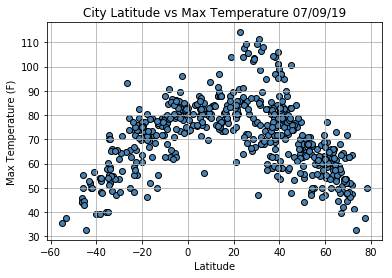

In [19]:
# Add title and labels for each axis.
plt.title("City Latitude vs Max Temperature " + timeStamp)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Assign df columns to variables.
latX = noNulls_df['Lat']
maxTempY = noNulls_df['Max Temp']

# Plot each scatter using the variables.
maxTempScatter = plt.scatter(latX, maxTempY, marker='o', color='steelblue', edgecolors='0')
  
# Add a grid to the plot.
plt.grid()

# Save figure and display it here.
plt.savefig('latVsTemp.png', bbox_inches='tight')

plt.show()

#### Latitude vs. Humidity Plot

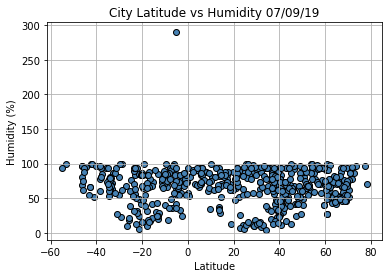

In [20]:
# Add title and labels for each axis.
plt.title("City Latitude vs Humidity " + timeStamp)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Assign df columns to variables.
latX = noNulls_df['Lat']
humidityY = noNulls_df['Humidity']


# Plot each scatter using the variables.
humidityScatter = plt.scatter(latX, humidityY, marker='o', color='steelblue', edgecolors='0')

# Add a grid to the plot.
plt.grid()

# Save figure and display it here.
plt.savefig('latVsHumid.png', bbox_inches='tight')

plt.show()

#### Latitude vs. Cloudiness Plot

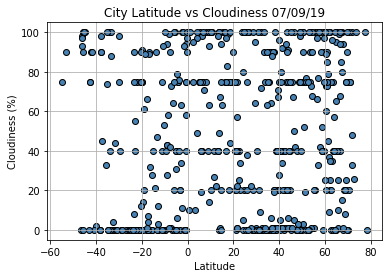

In [22]:
# Add title and labels for each axis.
plt.title("City Latitude vs Cloudiness " + timeStamp)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Assign df columns to variables.
latX = noNulls_df['Lat']
cloudinessY = noNulls_df['Cloudiness']


# Plot each scatter using the variables.
cloudinessScatter = plt.scatter(latX, cloudinessY, marker='o', color='steelblue', edgecolors='0')

# Add a grid to the plot.
plt.grid()

# Save figure and display it here.
plt.savefig('latVsCloud.png', bbox_inches='tight')

plt.show()

#### Latitude vs. Wind Speed Plot

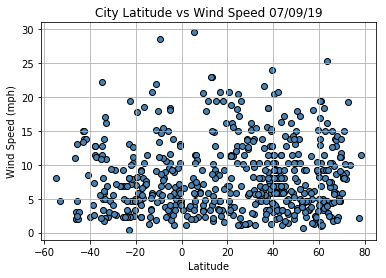

In [23]:
# Add title and labels for each axis.
plt.title("City Latitude vs Wind Speed "  + timeStamp)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Assign df columns to variables.
latX = noNulls_df['Lat']
speedY = noNulls_df['Wind Speed']


# Plot each scatter using the variables.
windSpeedScatter = plt.scatter(latX, speedY, marker='o', color='steelblue', edgecolors='0')

# Add a grid to the plot.
plt.grid()

# Save figure and display it here.
plt.savefig('latVsWind.png', bbox_inches='tight')

plt.show()